In [15]:
!pip install mplleaflet

import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
%load_ext google.colab.data_table
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "y",
          "axes.facecolor" : "None",
          "text.color" : 'w'}
plt.rcParams.update(params)

In [151]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.loc[~(df['Date'].dt.month.eq(2) & df['Date'].dt.day.eq(29))] # get rid of leap year days
df['DayOfYear'] = df['Date'].dt.strftime('%m-%d') # get rid or years
df['Data_Value'] = df['Data_Value'] / 10 # temperature from tenths of Cs to C

df_MAX = df[['DayOfYear','Data_Value']][(df['Element']=='TMAX') & df['Date'].dt.year.ge(2005) & df['Date'].dt.year.le(2014)].sort_values(by=['DayOfYear'])
df_MIN = df[['DayOfYear','Data_Value']][(df['Element']=='TMIN') & df['Date'].dt.year.ge(2005) & df['Date'].dt.year.le(2014)].sort_values(by=['DayOfYear'])
df_MAX_2015 = df[['DayOfYear','Data_Value']][(df['Element']=='TMAX') & df['Date'].dt.year.eq(2015)].sort_values(by=['DayOfYear'])
df_MIN_2015 = df[['DayOfYear','Data_Value']][(df['Element']=='TMIN') & df['Date'].dt.year.eq(2015)].sort_values(by=['DayOfYear'])


df_MAX = df_MAX.groupby(['DayOfYear']).max()
df_MIN = df_MIN.groupby(['DayOfYear']).min()
df_MAX_2015 = df_MAX_2015.groupby(['DayOfYear']).max()
df_MIN_2015 = df_MIN_2015.groupby(['DayOfYear']).min()
df_MAX_2015 = df_MAX_2015[['Data_Value']].where(df_MAX_2015['Data_Value'] > df_MAX['Data_Value']) # Select Max greater in history
df_MIN_2015 = df_MIN_2015[['Data_Value']].where(df_MIN_2015['Data_Value'] < df_MIN['Data_Value']) # Select Min lesser in history

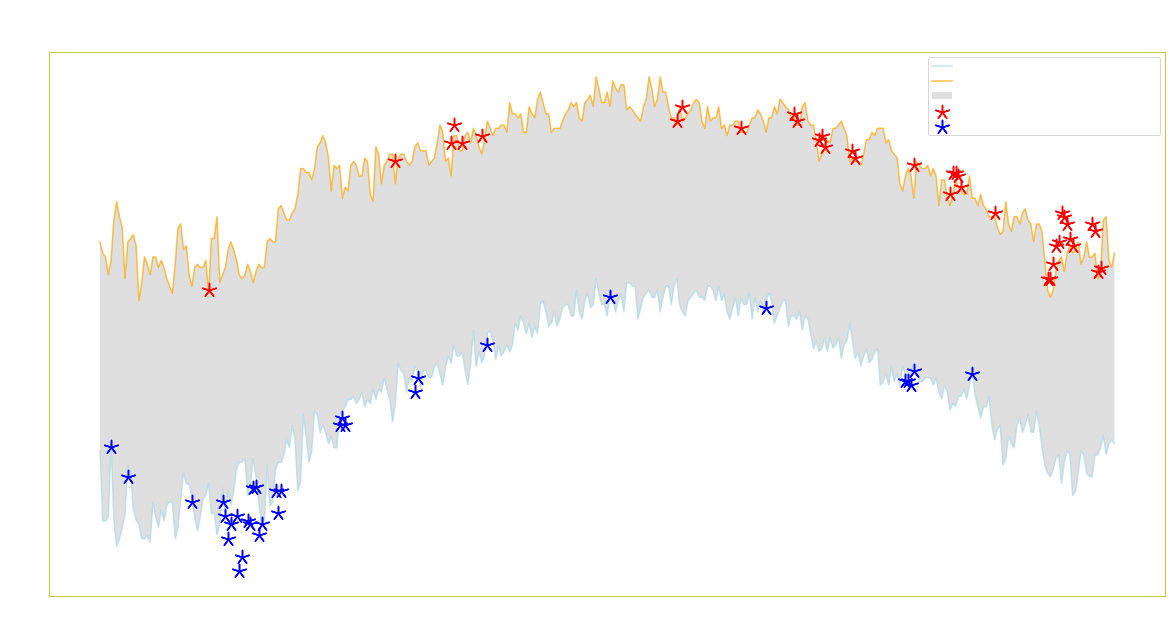

In [156]:
plt.figure(figsize=(20,10))
plt.xticks(np.linspace(0,366,12), ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

plt.plot(range(len(df_MAX_2015.index)), df_MIN[['Data_Value']], c='lightblue', alpha=0.7, zorder=1)
plt.plot(range(len(df_MAX_2015.index)), df_MAX[['Data_Value']], c='orange', alpha=0.7, scalex=list(df_MAX.index), zorder=1)
plt.fill_between(range(len(df_MIN['Data_Value'])), 
                       df_MIN['Data_Value'], df_MAX['Data_Value'], 
                       facecolor='gray', 
                       alpha=0.25, zorder=0)

plt.scatter(range(len(df_MAX_2015.index)), df_MAX_2015[['Data_Value']], c='red', s=200, marker=(5, 2), zorder=2)
plt.scatter(range(len(df_MIN_2015.index)), df_MIN_2015[['Data_Value']], c='blue', s=200, marker=(5, 2), zorder=2)

plt.title('Record temperatures by day 2005-2014 \n and record temperature broken in 2015\n Ann Arbor, Michigan, United States')
plt.ylabel('Temperature in degrees C')
plt.xlabel('Months of the year')
plt.legend(['Record low day of the year 2005-2014', 'Record high day of the year 2005-2014', 'Temperature range 2005-2014', 'Record high broken in 2015', 'Record low broken in 2015']);
